# Bloch Sphere with colorbar

In [1]:
import matplotlib as mpl
import numpy as np
from matplotlib import cm
from qutip import Bloch, about, basis, destroy, sesolve, sigmax, sigmay, sigmaz

%matplotlib inline

## Do a closed Landau-Zener Evolution

In [2]:
delta = 0.5 * 2 * np.pi
v = 2.0 * 2 * np.pi  # sweep rate

H0 = delta / 2.0 * sigmax()
H1 = v / 2.0 * sigmaz()
H = [H0, [H1, "t"]]
psi0 = basis(2, 0)

sm = destroy(2)
sx = sigmax()
sy = sigmay()
sz = sigmaz()
expt_ops = [sm.dag() * sm, sx, sy, sz]


tlist = np.linspace(-10.0, 10.0, 1500)
expt_list = sesolve(H, psi0, tlist, expt_ops).expect
expt_list = [np.array(exp) for exp in expt_list]

10.0%. Run time:   0.01s. Est. time left: 00:00:00:00


20.0%. Run time:   0.03s. Est. time left: 00:00:00:00


30.0%. Run time:   0.04s. Est. time left: 00:00:00:00


40.0%. Run time:   0.05s. Est. time left: 00:00:00:00


50.0%. Run time:   0.06s. Est. time left: 00:00:00:00


60.0%. Run time:   0.07s. Est. time left: 00:00:00:00


70.0%. Run time:   0.07s. Est. time left: 00:00:00:00


80.1%. Run time:   0.09s. Est. time left: 00:00:00:00


90.1%. Run time:   0.10s. Est. time left: 00:00:00:00


100.0%. Run time:   0.11s. Est. time left: 00:00:00:00


Total run time:   0.11s


## Generate a Bloch Sphere with Multi-Colored Points

Note that I need to call `b.show` here so that I can grab a Figure instance later

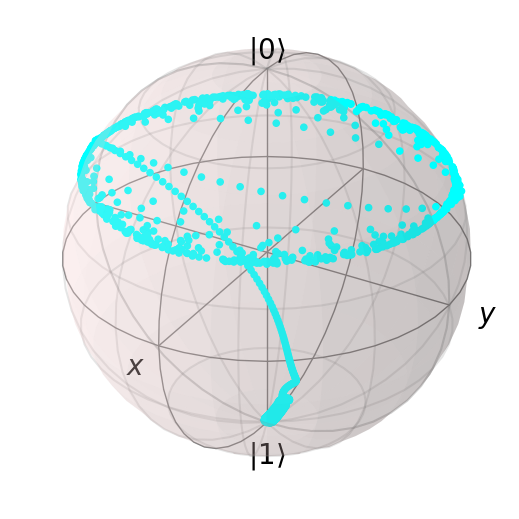

In [3]:
b = Bloch()
# normalize colors to times in tlist ##
nrm = mpl.colors.Normalize(-2, 10)
colors = cm.cool(nrm(tlist))

# add data points from expectation values ##
b.add_points([expt_list[1], expt_list[2], -expt_list[3]], "m")

# customize sphere properties ##
b.point_color = list(colors)
b.point_marker = ["o"]
b.point_size = [20]

b.zlpos = [1.1, -1.2]

b.show()

## Add  New Axis to Bloch Figure

In [4]:
left, bottom, width, height = [0.98, 0.05, 0.05, 0.9]
ax2 = b.fig.add_axes([left, bottom, width, height])

mpl.colorbar.ColorbarBase(ax2, cmap=cm.cool, norm=nrm, orientation="vertical");

## Plot with Colorbar Added

Currently I need to call `b.fig` as replotting figures in a notebook is a bit tricky.  However, this is likely to be improved in the future.

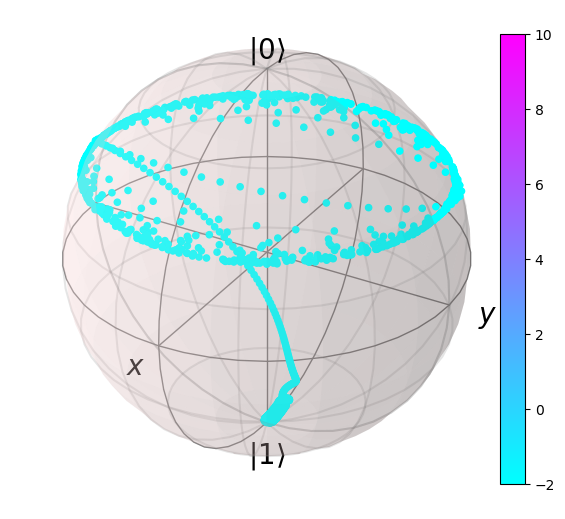

In [5]:
b.fig

In [6]:
about()


QuTiP: Quantum Toolbox in Python
Copyright (c) QuTiP team 2011 and later.
Current admin team: Alexander Pitchford, Nathan Shammah, Shahnawaz Ahmed, Neill Lambert, Eric Giguère, Boxi Li, Jake Lishman, Simon Cross and Asier Galicia.
Board members: Daniel Burgarth, Robert Johansson, Anton F. Kockum, Franco Nori and Will Zeng.
Original developers: R. J. Johansson & P. D. Nation.
Previous lead developers: Chris Granade & A. Grimsmo.
Currently developed through wide collaboration. See https://github.com/qutip for details.

QuTiP Version:      5.0.0.dev0+afd160b
Numpy Version:      1.22.4
Scipy Version:      1.8.1
Cython Version:     0.29.33
Matplotlib Version: 3.5.2
Python Version:     3.10.4
Number of CPUs:     2
BLAS Info:          Generic
INTEL MKL Ext:      False
Platform Info:      Linux (x86_64)
Installation path:  /home/runner/work/qutip-tutorials/qutip-tutorials/qutip/qutip
Please cite QuTiP in your publication.
For your convenience a bibtex reference can be easily generated using `